In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

dfL2 = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/bc_counts/FL2_counts.csv')
r_totL2 = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/bc_counts/FL2_Rtot.csv')

gene_index = []
for gene in dfL2["gene_ID"]:
    gene_index.append(gene)
#df.index = gene_index
dfL2.dropna(subset = ["gene_ID"], inplace = True)
dfL2 = dfL2.reset_index() 

all_genes = [] #list of all gene_IDs
for gene in gene_index:
    if gene != "NaN" and gene != "nan" and gene not in all_genes:
        all_genes.append(gene)
all_genes.pop(0)
print(len(all_genes))
print(len(dfL2))

r_totL2 = r_totL2.iloc[: , 1:]
dfL2.head()


3252
76106


,index,barcode,0_1,0_2,1,2,3,4,strand,pos,gene_ID,type,gene_symbol,description
0,19,ATGGCGCTCCTCGCATACCT,831,780,903,1078,938,1153,-,1410494.0,ECB_01323,cds,xisR,conserved hypothetical protein
1,20,ACAGCCTCCTTGCAAAGTCC,258,339,307,292,304,243,+,566047.0,ECB_00522,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit"
2,21,TAACCTCCCTCAGTGATTCT,7,29,17,0,0,8,+,380163.0,ECB_00344,cds,araJ,predicted transporter
3,22,TCGAGATTTCGTGCGAAGGA,256,271,396,501,474,574,-,4316396.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator
4,24,TCGACTTGACGGTCCAAATC,33,12,40,0,0,0,+,4486663.0,ECB_04141,cds,yjhB,predicted transporter


In [69]:
all_dfs = {} #dictionary of gene_ID to corresponding dataframe

for gene in all_genes:            
    all_dfs[gene] = dfL2[dfL2.gene_ID == gene]   

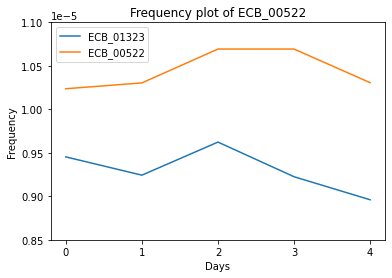

In [70]:
RtotL2_dict = dict(zip(r_totL2.columns.values, r_totL2.iloc[0].values))

#days
days = [0, 1, 2, 3, 4]

#function that takes the frequency average of a column (for a certain day)
def avg_freq(df, day, Rtot_dict):
    freq_vals = [] #all frequency values
    for count in df[day]:
        freq = count/Rtot_dict[day]
        freq_vals.append(freq)
    avg = np.sum(freq_vals)/len(freq_vals) #avg of all frequency values
    
    return avg
    
#function that yields average frequency of all barcodes in a single gene over 5 days (0-4 days)
def freq_over_days(df, Rtot_dict):
    all_freqs = []
    for day in ["0_1","0_2","1","2","3","4"]:
        all_freqs.append(avg_freq(df, day, Rtot_dict))
    day0 = (all_freqs[0]+all_freqs[1])/2
    all_freqs.pop(0)
    all_freqs.pop(0)
    all_freqs.insert(0, day0)
    #print(all_freqs)
    return all_freqs

def plot_freq(freq_array, gene):
    days = [0, 1, 2, 3, 4]
    plt.plot(days, freq_array, label = gene)
    plt.xticks(np.arange(0,len(days),1))
    plt.ylim([0.85e-5,1.1e-5])
    plt.xlabel("Days")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Frequency plot of ECB_00522")
    
plot_freq(freq_over_days(all_dfs["ECB_01323"], RtotL2_dict),"ECB_01323")
plot_freq(freq_over_days(all_dfs["ECB_00522"], RtotL2_dict), "ECB_00522")

In [71]:
#discard of counts under an average of 30
def discard(df):
    to_discard = []
    for i in range(len(df)):
        sum = 0
        for day in ["0_1","0_2","1","2","3","4"]:
            sum += df.loc[i,day] 
        if sum/6 < 30: #average count across days is < 30 --> discard
            to_discard.append(i)
    return to_discard

dfL2_dropped = dfL2.copy()

dfL2_dropped.drop(labels=discard(dfL2), axis=0, inplace=True)
print(len(discard(dfL2)))
dfL2_dropped = dfL2_dropped.reset_index() 
print(len(dfL2_dropped))
dfL2_dropped.head(50)

20087
56019


,level_0,index,barcode,0_1,0_2,1,2,3,4,strand,pos,gene_ID,type,gene_symbol,description
0,0,19,ATGGCGCTCCTCGCATACCT,831,780,903,1078,938,1153,-,1410494.0,ECB_01323,cds,xisR,conserved hypothetical protein
1,1,20,ACAGCCTCCTTGCAAAGTCC,258,339,307,292,304,243,+,566047.0,ECB_00522,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit"
2,3,22,TCGAGATTTCGTGCGAAGGA,256,271,396,501,474,574,-,4316396.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator
3,6,26,ATTCGTCCTCGTGTCGTCGA,190,122,176,194,14,226,-,273423.0,ECB_00246,cds,yagU,conserved inner membrane protein
4,7,29,TCCCATACGACCGATTCCAA,130,97,111,192,83,103,+,3671642.0,ECB_03425,cds,yiaI,"predicted hydrogenase, 4Fe-4S ferredoxin-type ..."
5,8,31,ATGGATATAGACTTACATGA,89,118,95,202,193,221,+,3120787.0,ECB_02916,cds,yqiG,predicted outer membrane usher protein
6,9,32,TACATACAACTTGCTCCAAC,237,232,248,256,270,103,+,556109.0,ECB_00513,cds,NaN,conserved hypothetical protein
7,10,33,TCACTTGACAATCACGTCCC,156,149,290,328,279,329,-,782097.0,ECB_00722,cds,ybhH,hypothetical protein
8,13,36,AGTTCCTCAGCCCTCTCCCG,19,30,17,90,16,34,-,3736863.0,ECB_03479,cds,waaL,"Lipid A-core, surface polymer ligase"
9,14,37,TTCTTACAAAACCCCGACGT,48,71,23,68,18,27,-,4529954.0,ECB_04189,cds,fimH,minor component of type 1 fimbriae


In [82]:
#dictionary with days and corresponding Rtot
RtotL2_dict = dict(zip(r_totL2.columns.values, r_totL2.iloc[0].values))

dfL2_freqs = dfL2_dropped.copy() #df with freqs of all days

def frequency(df_freqs, rtot):
    for day in ["0_1","0_2","1","2","3","4"]:
        freq_vals = [] #all frequency values
        for count in df_freqs[day]:
            freq = count/rtot[day]
            freq_vals.append(freq)
        df_freqs["%s_freq" % day] = freq_vals
    df_freqs.insert(15, "0_freq", df_freqs[["0_1_freq", "0_2_freq"]].mean(axis=1))
    
frequency(dfL2_freqs, RtotL2_dict)
#dfL2_freqs = dfL2_freqs.drop(dfL2_freqs.columns[[15, 16]], axis=1)
dfL2_freqs.head(50)

,level_0,index,barcode,0_1,0_2,1,2,3,4,strand,...,type,gene_symbol,description,0_freq,0_1_freq,0_2_freq,1_freq,2_freq,3_freq,4_freq
0,0,19,ATGGCGCTCCTCGCATACCT,831,780,903,1078,938,1153,-,...,cds,xisR,conserved hypothetical protein,5.990541e-05,6.417774e-05,5.563309e-05,0.000065,7.374955e-05,7.314744e-05,0.000065
1,1,20,ACAGCCTCCTTGCAAAGTCC,258,339,307,292,304,243,+,...,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit",2.205211e-05,1.992522e-05,2.417900e-05,0.000022,1.997669e-05,2.370663e-05,0.000014
2,3,22,TCGAGATTTCGTGCGAAGGA,256,271,396,501,474,574,-,...,cds,adiY,DNA-binding transcriptional activator,1.954985e-05,1.977076e-05,1.932893e-05,0.000028,3.427507e-05,3.696363e-05,0.000032
3,6,26,ATTCGTCCTCGTGTCGTCGA,190,122,176,194,14,226,-,...,cds,yagU,conserved inner membrane protein,1.168760e-05,1.467361e-05,8.701586e-06,0.000013,1.327218e-05,1.091753e-06,0.000013
4,7,29,TCCCATACGACCGATTCCAA,130,97,111,192,83,103,+,...,cds,yiaI,"predicted hydrogenase, 4Fe-4S ferredoxin-type ...",8.479156e-06,1.003984e-05,6.918474e-06,0.000008,1.313536e-05,6.472535e-06,0.000006
5,8,31,ATGGATATAGACTTACATGA,89,118,95,202,193,221,+,...,cds,yqiG,predicted outer membrane usher protein,7.644858e-06,6.873428e-06,8.416288e-06,0.000007,1.381949e-05,1.505059e-05,0.000012
6,9,32,TACATACAACTTGCTCCAAC,237,232,248,256,270,103,+,...,cds,NaN,conserved hypothetical protein,1.742534e-05,1.830340e-05,1.654728e-05,0.000018,1.751381e-05,2.105523e-05,0.000006
7,10,33,TCACTTGACAATCACGTCCC,156,149,290,328,279,329,-,...,cds,ybhH,hypothetical protein,1.133758e-05,1.204781e-05,1.062735e-05,0.000021,2.243957e-05,2.175707e-05,0.000019
8,13,36,AGTTCCTCAGCCCTCTCCCG,19,30,17,90,16,34,-,...,cds,waaL,"Lipid A-core, surface polymer ligase",1.803548e-06,1.467361e-06,2.139734e-06,0.000001,6.157198e-06,1.247718e-06,0.000002
9,14,37,TTCTTACAAAACCCCGACGT,48,71,23,68,18,27,-,...,cds,fimH,minor component of type 1 fimbriae,4.385528e-06,3.707017e-06,5.064038e-06,0.000002,4.652105e-06,1.403682e-06,0.000002


In [83]:
dfL2_x = dfL2_freqs.copy() #df with freqs of VST (variance stabilizing transformation)

def x_freq(df_x):
    for freq in ["0_freq","1_freq","2_freq","3_freq","4_freq"]:
        x_vals = [] #all frequency values
        for count in df_x[freq]:
            count = np.sqrt(count)
            x_vals.append(count)
        df_x["x(%s)" % freq] = x_vals

df_L2 = x_freq(dfL2_x)  
dfL2_x = dfL2_x.drop(dfL2_x.columns[[0, 1, 3, 4, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21]], axis=1)
dfL2_x.head(50)


,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq)
0,ATGGCGCTCCTCGCATACCT,-,1410494.0,ECB_01323,cds,xisR,conserved hypothetical protein,0.007740,0.008061,0.008588,0.008553,0.008057
1,ACAGCCTCCTTGCAAAGTCC,+,566047.0,ECB_00522,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit",0.004696,0.004700,0.004470,0.004869,0.003699
2,TCGAGATTTCGTGCGAAGGA,-,4316396.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.004422,0.005338,0.005854,0.006080,0.005685
3,ATTCGTCCTCGTGTCGTCGA,-,273423.0,ECB_00246,cds,yagU,conserved inner membrane protein,0.003419,0.003559,0.003643,0.001045,0.003567
4,TCCCATACGACCGATTCCAA,+,3671642.0,ECB_03425,cds,yiaI,"predicted hydrogenase, 4Fe-4S ferredoxin-type ...",0.002912,0.002826,0.003624,0.002544,0.002408
5,ATGGATATAGACTTACATGA,+,3120787.0,ECB_02916,cds,yqiG,predicted outer membrane usher protein,0.002765,0.002615,0.003717,0.003880,0.003527
6,TACATACAACTTGCTCCAAC,+,556109.0,ECB_00513,cds,NaN,conserved hypothetical protein,0.004174,0.004225,0.004185,0.004589,0.002408
7,TCACTTGACAATCACGTCCC,-,782097.0,ECB_00722,cds,ybhH,hypothetical protein,0.003367,0.004568,0.004737,0.004664,0.004304
8,AGTTCCTCAGCCCTCTCCCG,-,3736863.0,ECB_03479,cds,waaL,"Lipid A-core, surface polymer ligase",0.001343,0.001106,0.002481,0.001117,0.001384
9,TTCTTACAAAACCCCGACGT,-,4529954.0,ECB_04189,cds,fimH,minor component of type 1 fimbriae,0.002094,0.001287,0.002157,0.001185,0.001233


In [85]:
dfL2_x_corr = dfL2_x.copy() #df with corrected freqs of VST (variance stabilizing transformation)
df_s = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/fitness/FL2_fitness.csv')
df_t_xbar = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/meanfitness/FL2_xbar.csv')

df_t_xbar.head()

,Unnamed: 0,Day label,xbar,stderr,gens
0,0,1,0.003990,0.000349,6.643856
1,1,2,0.002142,0.000193,13.287712
2,2,3,0.001838,0.000154,19.931569
3,3,4,0.001948,0.000122,26.575425


In [86]:
tL2_dict = {}
xbarL2_dict = {}

#dictionary of (day:generation)
for day, gen, xbar in zip(df_t_xbar["Day label"], df_t_xbar["gens"], df_t_xbar["xbar"]):
    tL2_dict[day] = gen
    xbarL2_dict[day] = xbar
print(tL2_dict)
print(xbarL2_dict)

{1: 6.64385619, 2: 13.28771238, 3: 19.93156857, 4: 26.57542476}
{1: 0.0039902891181367575, 2: 0.00214170246320143, 3: 0.0018382904872751653, 4: 0.0019476373875400622}


In [87]:
sL2_dict = dict(zip(df_s["gene_ID"], df_s["s"]))

In [98]:
dfL2_x_corr = dfL2_x.copy()

#dropping rows/gene_IDs with no "s" value
no_s = []
for i in range(len(dfL2_x_corr)):
    index_gene = dfL2_x_corr.columns.get_loc("gene_ID")
    if dfL2_x_corr.iloc[i,index_gene] not in sL2_dict.keys():
        no_s.append(i)
dfL2_x_corr.drop(no_s, axis=0, inplace=True)
dfL2_x_corr = dfL2_x_corr.reset_index()
dfL2_x_corr = dfL2_x_corr.drop(dfL2_x_corr.columns[[0]], axis=1)

#calculating x_corrected
days = [1, 2, 3, 4]
x_freqs = ["x(1_freq)","x(2_freq)","x(3_freq)","x(4_freq)"]

def x_corr_form(day, x, s_dict, t_dict, xbar_dict, df_x_corr):
    x_corr_vals = []
    for i in range(len(df_x_corr)):
        #index = day-1
        index_0 = df_x_corr.columns.get_loc("x(0_freq)")
        index_t = df_x_corr.columns.get_loc(x)
        x_0 = df_x_corr.iloc[i, index_0]
        x_t = df_x_corr.iloc[i, index_t]
        index_gene = df_x_corr.columns.get_loc("gene_ID")
        gene_ID = df_x_corr.iloc[i, index_gene]
        if gene_ID in s_dict.keys():
            s = s_dict[gene_ID]
        else:
            continue;
        t = t_dict[day]
        xbar = xbar_dict[day]
        x_corr = x_corr_ele(x_0, x_t, s, xbar, t)
        x_corr_vals.append(x_corr)
    return x_corr_vals
        
def x_corr_ele(x_0, x_t, s, xbar, t):
    x_corr = x_t - (x_0*math.exp((s-xbar)* (t/2)))
    return x_corr

#x_corr
for day, x in zip(days, x_freqs):
    x_corr = x_corr_form(day, x, sL2_dict, tL2_dict, xbarL2_dict, dfL2_x_corr)
    dfL2_x_corr["x_corr(%s)" % day] = x_corr
    
print(len(dfL2_x_corr))
dfL2_x_corr.head(50)

47591


,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq),x_corr(1),x_corr(2),x_corr(3),x_corr(4)
0,ATGGCGCTCCTCGCATACCT,-,1410494.0,ECB_01323,cds,xisR,conserved hypothetical protein,0.007740,0.008061,0.008588,0.008553,0.008057,0.000530,0.001169,0.001267,0.000928
1,ACAGCCTCCTTGCAAAGTCC,+,566047.0,ECB_00522,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit",0.004696,0.004700,0.004470,0.004869,0.003699,0.000039,-0.000215,0.000176,-0.000986
2,TCGAGATTTCGTGCGAAGGA,-,4316396.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.004422,0.005338,0.005854,0.006080,0.005685,0.000959,0.001464,0.001692,0.001314
3,ATTCGTCCTCGTGTCGTCGA,-,273423.0,ECB_00246,cds,yagU,conserved inner membrane protein,0.003419,0.003559,0.003643,0.001045,0.003567,0.000177,0.000256,-0.002336,0.000203
4,TCCCATACGACCGATTCCAA,+,3671642.0,ECB_03425,cds,yiaI,"predicted hydrogenase, 4Fe-4S ferredoxin-type ...",0.002912,0.002826,0.003624,0.002544,0.002408,-0.000015,0.000818,-0.000220,-0.000304
5,ATGGATATAGACTTACATGA,+,3120787.0,ECB_02916,cds,yqiG,predicted outer membrane usher protein,0.002765,0.002615,0.003717,0.003880,0.003527,-0.000142,0.000936,0.001081,0.000722
6,TCACTTGACAATCACGTCCC,-,782097.0,ECB_00722,cds,ybhH,hypothetical protein,0.003367,0.004568,0.004737,0.004664,0.004304,0.001231,0.001389,0.001316,0.000966
7,AGTTCCTCAGCCCTCTCCCG,-,3736863.0,ECB_03479,cds,waaL,"Lipid A-core, surface polymer ligase",0.001343,0.001106,0.002481,0.001117,0.001384,-0.000216,0.001164,-0.000191,0.000088
8,TTCTTACAAAACCCCGACGT,-,4529954.0,ECB_04189,cds,fimH,minor component of type 1 fimbriae,0.002094,0.001287,0.002157,0.001185,0.001233,-0.000796,0.000060,-0.000920,-0.000872
9,GGCGCGCCTTCCCTCCCCGA,+,3609484.0,ECB_03374,cds,kdgK,ketodeoxygluconokinase,0.001513,0.002276,0.002616,0.002466,0.001711,0.000812,0.001181,0.001065,0.000346


In [100]:
#list of all x_corr(t) for each barcode:
xL2_corrs = dfL2_x_corr[["x_corr(1)","x_corr(2)","x_corr(3)","x_corr(4)"]].values.tolist()

def x_var(x_corrs, df_x_corr):
    x_c_var = []
    for x_c in x_corrs:
        x_var = np.var(x_c)
        x_c_var.append(x_var)
    df_x_corr["var(x_corr)"] = x_c_var

x_var(xL2_corrs, dfL2_x_corr)
dfL2_x_corr.head(50)    


,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq),x_corr(1),x_corr(2),x_corr(3),x_corr(4),var(x_corr)
0,ATGGCGCTCCTCGCATACCT,-,1410494.0,ECB_01323,cds,xisR,conserved hypothetical protein,0.007740,0.008061,0.008588,0.008553,0.008057,0.000530,0.001169,0.001267,0.000928,8.086454e-08
1,ACAGCCTCCTTGCAAAGTCC,+,566047.0,ECB_00522,cds,nfrA,"bacteriophage N4 receptor, outer membrane subunit",0.004696,0.004700,0.004470,0.004869,0.003699,0.000039,-0.000215,0.000176,-0.000986,2.020066e-07
2,TCGAGATTTCGTGCGAAGGA,-,4316396.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.004422,0.005338,0.005854,0.006080,0.005685,0.000959,0.001464,0.001692,0.001314,7.085515e-08
3,ATTCGTCCTCGTGTCGTCGA,-,273423.0,ECB_00246,cds,yagU,conserved inner membrane protein,0.003419,0.003559,0.003643,0.001045,0.003567,0.000177,0.000256,-0.002336,0.000203,1.218593e-06
4,TCCCATACGACCGATTCCAA,+,3671642.0,ECB_03425,cds,yiaI,"predicted hydrogenase, 4Fe-4S ferredoxin-type ...",0.002912,0.002826,0.003624,0.002544,0.002408,-0.000015,0.000818,-0.000220,-0.000304,1.975308e-07
5,ATGGATATAGACTTACATGA,+,3120787.0,ECB_02916,cds,yqiG,predicted outer membrane usher protein,0.002765,0.002615,0.003717,0.003880,0.003527,-0.000142,0.000936,0.001081,0.000722,2.248861e-07
6,TCACTTGACAATCACGTCCC,-,782097.0,ECB_00722,cds,ybhH,hypothetical protein,0.003367,0.004568,0.004737,0.004664,0.004304,0.001231,0.001389,0.001316,0.000966,2.556375e-08
7,AGTTCCTCAGCCCTCTCCCG,-,3736863.0,ECB_03479,cds,waaL,"Lipid A-core, surface polymer ligase",0.001343,0.001106,0.002481,0.001117,0.001384,-0.000216,0.001164,-0.000191,0.000088,3.169326e-07
8,TTCTTACAAAACCCCGACGT,-,4529954.0,ECB_04189,cds,fimH,minor component of type 1 fimbriae,0.002094,0.001287,0.002157,0.001185,0.001233,-0.000796,0.000060,-0.000920,-0.000872,1.615640e-07
9,GGCGCGCCTTCCCTCCCCGA,+,3609484.0,ECB_03374,cds,kdgK,ketodeoxygluconokinase,0.001513,0.002276,0.002616,0.002466,0.001711,0.000812,0.001181,0.001065,0.000346,1.026243e-07


In [101]:
#create df with variances and corresponding geneIDs
def list_genes(df_x_corr):
    updated_genes = []
    for gene in df_x_corr["gene_ID"].tolist():
        if gene not in updated_genes:
            updated_genes.append(gene)
    return updated_genes

#getting average variance of barcodes in each gene:
def avg_var(df_x_corr):
    avg_vars = []
    std_vars = []
    for gene in list_genes(df_x_corr):
        df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene]
        x_vars = df_gene["var(x_corr)"].mean()
        avg_vars.append(x_vars)
        x_std = np.sqrt(x_vars)
        std_vars.append(x_std)
    return [avg_vars, std_vars]

bcL2_data = {"gene_ID": list_genes(dfL2_x_corr), "avg_var(x_corr)": avg_var(dfL2_x_corr)[0], "std(x_corr)": avg_var(dfL2_x_corr)[1]}
dfL2_bc = pd.DataFrame(bcL2_data)
dfL2_bc = dfL2_bc.sort_values(by = 'avg_var(x_corr)', ascending=[False])
dfL2_bc = dfL2_bc.reset_index() 
dfL2_bc.head(50)

,index,gene_ID,avg_var(x_corr),std(x_corr)
0,1531,ECB_02677,1.936339e-06,0.001392
1,1606,ECB_02595,7.633599e-07,0.000874
2,1974,ECB_03370,6.961900e-07,0.000834
3,1979,ECB_03800,6.753844e-07,0.000822
4,1716,ECB_02785,6.315110e-07,0.000795
5,1815,ECB_02865,6.184102e-07,0.000786
6,863,ECB_01645,6.070574e-07,0.000779
7,1536,ECB_02551,5.113362e-07,0.000715
8,544,ECB_01904,4.980374e-07,0.000706
9,1935,ECB_02679,4.964940e-07,0.000705


In [123]:
dfL2_bc.to_csv('FL2.csv')

In [119]:
#df_x_corr
#first 3 genes with highest variance:
def plot_x(df_gene, gene_ID):
    for i in range(len(df_gene)):
        barcode = df_gene.iloc[i,0]
        x_array = df_gene.iloc[i,8:12].tolist()
        days = [1, 2, 3, 4]
        plt.plot(days, x_array)#, label = barcode)
        plt.xticks(np.arange(1,len(days)+1,1))
        plt.xlabel("Days")
        plt.ylabel("x(t)")
        plt.ylim([-0.02,0.02])
        #plt.legend()
        plt.title(gene_ID)
    plt.show()
    
def plot_x_corr(df_gene, gene_ID):
    for i in range(len(df_gene)):
        barcode = df_gene.iloc[i,0]
        x_array = df_gene.iloc[i,12:16].tolist()
        days = [1, 2, 3, 4]
        plt.plot(days, x_array)#, label = barcode)
        plt.xticks(np.arange(1,len(days)+1,1))
        plt.xlabel("Days")
        plt.ylabel("x_corr(t)")
        plt.ylim([-0.02,0.02])
        #plt.legend()
        plt.title(gene_ID)
    plt.show()

def plot_gene_x(gene_ID, df_x_corr):
    #gene_ID = df_bc.iloc[i, 1] #1 is index of gene_ID
    df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene_ID]
    plot_x(df_gene, gene_ID)
    
def plot_gene_x_corr(gene_ID, df_x_corr):
    #gene_ID = df_bc.iloc[i, 1] #1 is index of gene_ID
    df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene_ID]
    plot_x_corr(df_gene, gene_ID)

In [117]:
def plot_first(df_bc, df_x_corr, n): #number of first nth genes to plot for df_bc
    gene_order = df_bc["gene_ID"].tolist()
    for gene in gene_order[0:n]:
        plot_gene_x(gene, df_x_corr)
        plot_gene_x_corr(gene, df_x_corr)
        
def plot_last(df_bc, df_x_corr, n): #number of first nth genes to plot for df_bc
    gene_order = df_bc["gene_ID"].tolist()
    for gene in gene_order[-n:]:
        plot_gene_x(gene, df_x_corr)
        plot_gene_x_corr(gene, df_x_corr)

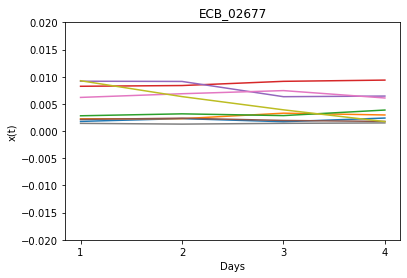

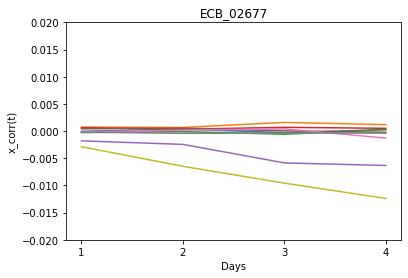

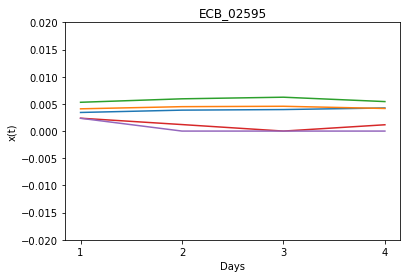

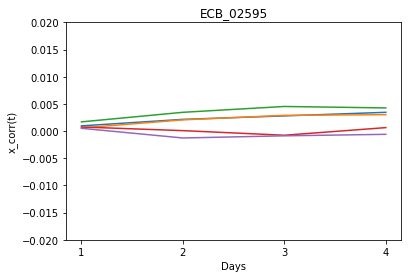

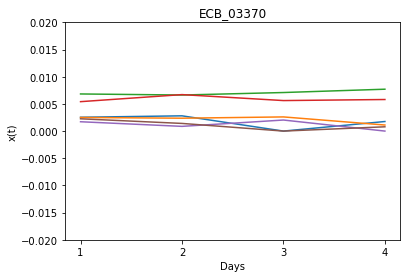

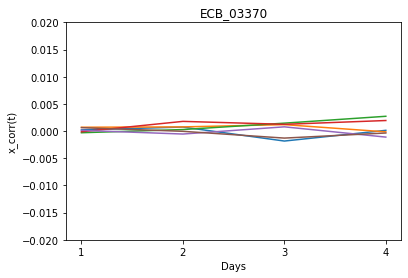

In [120]:
plot_first(dfL2_bc, dfL2_x_corr, 3)

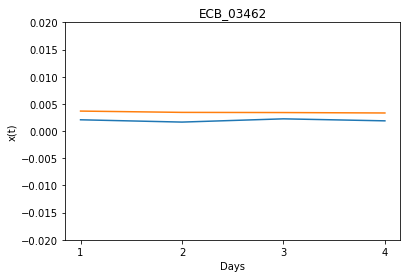

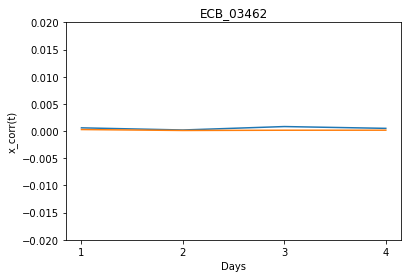

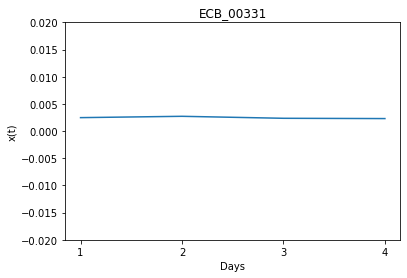

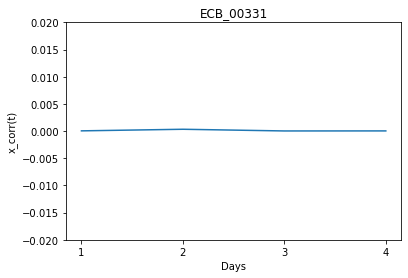

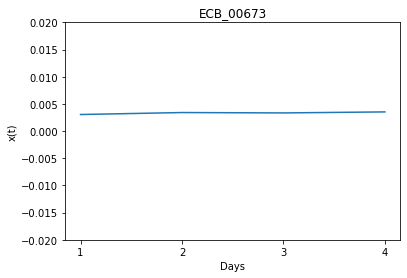

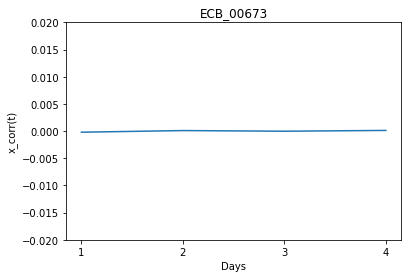

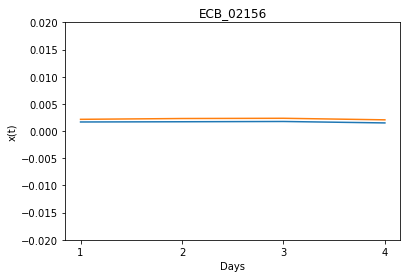

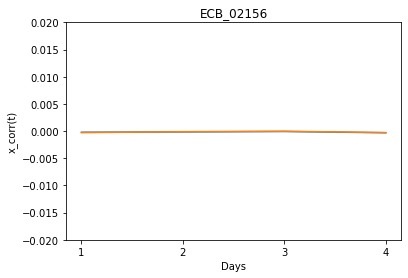

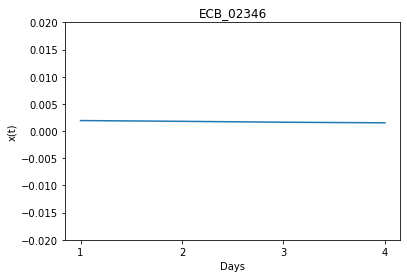

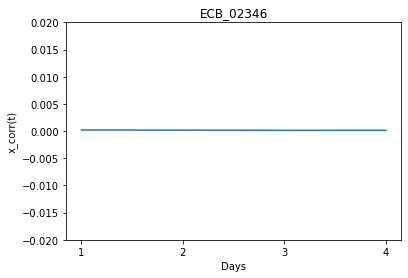

In [121]:
plot_last(dfL2_bc, dfL2_x_corr, 5)